## 1. Basic Protein sequence handling 
Load, preprocess, and visualize protein sequences.

## Task
Load protein sequences from a FASTA file using Biopython.

Clean and tokenize sequences (remove unknowns, ensure valid amino acids).

Calculate sequence length, amino acid frequency.

In [3]:
from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt

In [12]:
sequences = [str(record.seq ) for record in SeqIO.parse("example.fasta", "fasta")]
sequences

['MDITIHNPLIRRPLFSWLAPSRIFDQIFGEHLQESELLPASPSLSPFLMRSPIFRMPSWLETGLSEMRLEKDKFSVNLDVKHFSPEELKVKVLGDMVEIHGKHEERQDEHGFIAREFNRKYRIPADVDPLTITSSLSLDGVLTVSAPRKQSDVPERSIPITREEKPAIAGAQRK',
 'MDIAIHHPWIRRPFFPFHSPSRLFDQFFGEHLLESDLFPASTSLSPFYLRPPSFLRAPSWIDTGLSEMRLEKDRFSVNLDVKHFSPEELKVKVLGDVIEVHGKHEERQDEHGFISREFHRKYRIPADVDPLAITSSLSSDGVLTVNGPRKQASGPERTIPITREEKPAVTAAPKK',
 'MDITIHNPLVRRPLFSWLTPSRIFDQIFGEHLQESELLPTSPSLSPFLMRSPFFRMPSWLETGLSEMRLEKDKFSVNLDVKHFSPEELKVKVLGDMIEIHGKHEERQDEHGFIAREFSRKYRIPADVDPLTITSSLSLDGVLTVSAPRKQSDVPERSIPITREEKPAIAGSQRK',
 'MDIAIHHPWIRRPFFPFHSPSRLFDQFFGEHLLESDLFPTSTSLSPFYLRPPSFLRAPSWFDTGLSEMRLEKDRFSVNLDVKHFSPEELKVKVLGDVIEVHGKHEERQDEHGFISREFHRKYRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKPAVTAAPKK',
 'MDIAIHHPWIRRPFFPFHSPSRLFDQFFGEHLLESDLFSTATSLSPFYLRPPSFLRAPSWIDTGLSEMRMEKDRFSVNLDVKHFSPEELKVKVLGDVVEVHGKHEERQDEHGFISREFHRKYRIPADVDPLTITSSLSSDGVLTVNGPRKQASGPERTIPITREEKPAVTAAPKK',
 'MDIAIHHPWIRRPFFPFHSPSRLFDQFFGEHLLESDLFSTATSLSPFYLRPPSFLRAPSWIDTGLSEMRLEKDRFSVNLDVKHFSPEELKVKVLGDVIEV

In [21]:
aa_counts = Counter("".join(sequences))

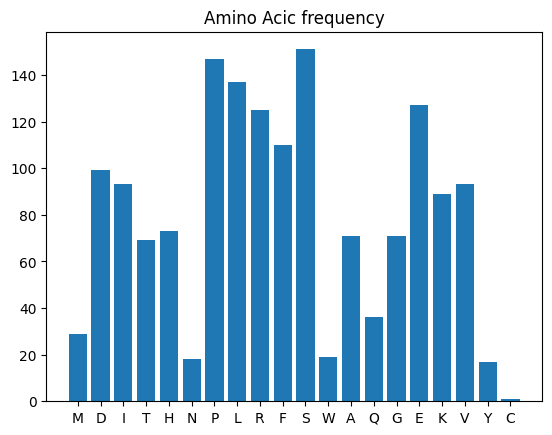

In [20]:
plt.bar(aa_counts.keys(), aa_counts.values())
plt.title("Amino Acic frequency")
plt.show()

## 2. Basic protein embeddings
Convert protein sequences into numerical features (manually and with pretrained models).

- One-hot encoding
  + Encode each amino acid as a vector of length 20.

- k-mer embeddings (e.g., 3-mer, 4-mer)

  + Split sequences into overlapping subwords and count their occurrences.

- Physicochemical property vectors

  + Use simple AAIndex-based properties like hydrophobicity, charge, polarity.

### 1. One-hot encoding of protein sequences

In [29]:
AMINO_ACIDS = 'ACDEFGHIKLMNPQRSTVWY'
aa_to_idx = {aa: idx for idx, aa in enumerate(AMINO_ACIDS)}
aa_to_idx


{'A': 0,
 'C': 1,
 'D': 2,
 'E': 3,
 'F': 4,
 'G': 5,
 'H': 6,
 'I': 7,
 'K': 8,
 'L': 9,
 'M': 10,
 'N': 11,
 'P': 12,
 'Q': 13,
 'R': 14,
 'S': 15,
 'T': 16,
 'V': 17,
 'W': 18,
 'Y': 19}

In [33]:
import numpy as np

# Define 20 standard amino acids
AMINO_ACIDS = 'ACDEFGHIKLMNPQRSTVWY'

aa_to_idx = {aa: idx for idx, aa in enumerate(AMINO_ACIDS)}
aa_to_idx

def one_hot_encode(sequence):
    encoding = np.zeros((len(sequence), len(AMINO_ACIDS)))
    for i, aa in enumerate(sequence):
        if aa in aa_to_idx:
            encoding[i, aa_to_idx[aa]] = 1
    return encoding
sequence = "ACAHS"
one_hot = one_hot_encode(sequence)
one_hot

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.]])

## 2. K-mer frequency vector
Convert a protein sequence into a numerical vector based on frequency of all possible k-mers (k-length subsequences)

It is like a bag-of-words in NLP

In [ ]:
from collections import Counter
import numpy as np
import itertools

def get_kmers(sequence, k=3):
    return [sequence[i:i + k] for i in range(len(sequence) - k + 1)]

# Extract k-mers -> count frequency -> generate all posibilities => create vector
def kmer_vector(sequence, k=3):
    kmers = get_kmers(sequence, k)
    counts = Counter(kmers)
    # Generate all possible k-mers (combinations of amino acis of length k)
    # k = 2, => 20x20 = 400 possible k-mers
    # k = 3 => 20x20x20 = 8000
    all_possible_kmers = [''.join(p) for p in itertools.product(AMINO_ACIDS, repeat=k)]
    print('All possible kmers', len(all_possible_kmers))
    vector = [counts[kmer] for kmer in all_possible_kmers]
    return np.array(vector)

sequence = "ACDEFACGHIK"
vec = kmer_vector(sequence, k=2)
print("vector length",len(vec))
print(vec)

All possible kmers 400
vector length 400
[0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
